In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from keras.models import Model,Sequential
from keras.layers import Input,Dense,LSTM,Bidirectional
from keras import backend as K
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
samsung= pd.read_csv('./samsung_data.csv',index_col=0)
samsung

,open,high,low,close,volume,prev,top_1,top_2,top_3,top_4,...,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_20
datetime,,,,,,,,,,,,,,,,,,,,,
2018-10-29 09:20,40800,40900,40750,40850,90497,50,-0.002968,-0.001743,-0.004199,-0.001510,...,0.004022,-0.003106,0.007953,-0.005732,0.000161,-0.000106,0.002548,0.002549,-0.007805,0.000992
2018-10-29 09:56,41050,41100,41050,41100,6777,50,-0.002120,-0.002212,0.004220,-0.006379,...,0.005555,0.002577,-0.000135,0.005530,-0.003320,0.001608,0.002994,-0.003264,0.000568,-0.003713
2018-10-29 15:30,41400,41400,41400,41400,1084329,0,-0.001114,0.006571,-0.003546,0.006705,...,-0.002814,0.006001,0.002459,-0.002532,0.004581,-0.004570,-0.004465,-0.002522,0.004941,-0.003640
2018-10-30 09:30,42450,42450,42400,42400,29979,-50,-0.001114,0.006571,-0.003546,0.006705,...,0.003558,-0.003640,-0.002814,0.002459,-0.002532,0.004581,-0.004570,-0.004465,-0.002522,0.004941
2018-10-30 11:00,42600,42650,42550,42600,9637,0,0.002620,0.007649,-0.000602,-0.002864,...,0.002968,-0.004638,0.004102,-0.001880,-0.003441,-0.004402,0.004926,-0.001276,0.004873,-0.007528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26 12:03,60700,60700,60600,60600,4623,-100,0.000620,-0.003379,-0.004112,0.008734,...,0.003576,0.003997,0.002494,-0.003869,-0.006298,-0.006515,-0.002687,0.000777,-0.004781,0.007633
2020-10-26 13:28,60400,60500,60400,60400,6501,0,0.000620,-0.003379,-0.004112,0.008734,...,0.003576,0.003997,0.002494,-0.003869,-0.006298,-0.006515,-0.002687,0.000777,0.007633,-0.004781
2020-10-30 09:59,57600,57700,57500,57600,167163,0,0.000620,-0.003379,-0.004112,0.008734,...,0.003576,0.003997,0.002494,-0.003869,-0.006298,-0.006515,-0.002687,0.000777,0.007633,-0.004781


In [4]:
target = samsung['close']

In [5]:
train = samsung.drop('close',axis=1,inplace=True)

In [6]:
target = target.values

In [7]:
target = target.reshape(-1,1)

In [8]:
scaler = StandardScaler()
scaler.fit(target)
target_scaled = scaler.transform(target)

In [9]:
target_scaled

array([[-9.18321573e-01],
       [-8.79351362e-01],
       [-8.32587108e-01],
       [-6.76706262e-01],
       [-6.45530092e-01],
       [-6.37736050e-01],
       [-6.06559881e-01],
       [-5.83177754e-01],
       [-5.59795627e-01],
       [-6.22147966e-01],
       [-6.06559881e-01],
       [-6.14353923e-01],
       [-6.22147966e-01],
       [-6.14353923e-01],
       [-6.76706262e-01],
       [-6.76706262e-01],
       [-6.76706262e-01],
       [-6.92294346e-01],
       [-7.46852643e-01],
       [-7.46852643e-01],
       [-7.46852643e-01],
       [-7.39058600e-01],
       [-7.31264558e-01],
       [-7.00088389e-01],
       [-6.45530092e-01],
       [-6.06559881e-01],
       [-5.83177754e-01],
       [-4.35090950e-01],
       [-4.42884992e-01],
       [-4.50679035e-01],
       [-4.35090950e-01],
       [-5.36413500e-01],
       [-5.36413500e-01],
       [-4.97443289e-01],
       [-5.75383712e-01],
       [-5.36413500e-01],
       [-4.42884992e-01],
       [-4.50679035e-01],
       [-3.0

In [10]:
target_df_scaled = pd.DataFrame(data=target_scaled,columns=['close'])

In [11]:
samsung

,open,high,low,volume,prev,top_1,top_2,top_3,top_4,top_5,...,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_20
datetime,,,,,,,,,,,,,,,,,,,,,
2018-10-29 09:20,40800,40900,40750,90497,50,-0.002968,-0.001743,-0.004199,-0.001510,-0.000879,...,0.004022,-0.003106,0.007953,-0.005732,0.000161,-0.000106,0.002548,0.002549,-0.007805,0.000992
2018-10-29 09:56,41050,41100,41050,6777,50,-0.002120,-0.002212,0.004220,-0.006379,-0.005763,...,0.005555,0.002577,-0.000135,0.005530,-0.003320,0.001608,0.002994,-0.003264,0.000568,-0.003713
2018-10-29 15:30,41400,41400,41400,1084329,0,-0.001114,0.006571,-0.003546,0.006705,-0.005564,...,-0.002814,0.006001,0.002459,-0.002532,0.004581,-0.004570,-0.004465,-0.002522,0.004941,-0.003640
2018-10-30 09:30,42450,42450,42400,29979,-50,-0.001114,0.006571,-0.003546,0.006705,0.006001,...,0.003558,-0.003640,-0.002814,0.002459,-0.002532,0.004581,-0.004570,-0.004465,-0.002522,0.004941
2018-10-30 11:00,42600,42650,42550,9637,0,0.002620,0.007649,-0.000602,-0.002864,0.003125,...,0.002968,-0.004638,0.004102,-0.001880,-0.003441,-0.004402,0.004926,-0.001276,0.004873,-0.007528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26 12:03,60700,60700,60600,4623,-100,0.000620,-0.003379,-0.004112,0.008734,-0.003865,...,0.003576,0.003997,0.002494,-0.003869,-0.006298,-0.006515,-0.002687,0.000777,-0.004781,0.007633
2020-10-26 13:28,60400,60500,60400,6501,0,0.000620,-0.003379,-0.004112,0.008734,-0.003865,...,0.003576,0.003997,0.002494,-0.003869,-0.006298,-0.006515,-0.002687,0.000777,0.007633,-0.004781
2020-10-30 09:59,57600,57700,57500,167163,0,0.000620,-0.003379,-0.004112,0.008734,-0.003865,...,0.003576,0.003997,0.002494,-0.003869,-0.006298,-0.006515,-0.002687,0.000777,0.007633,-0.004781


In [12]:
feature_scaler = StandardScaler()
feature_scaler.fit(samsung)
train_scaled = feature_scaler.transform(samsung)

In [13]:
train_df_scaled = pd.DataFrame(data=train_scaled,columns=samsung.columns)

In [14]:
X_train,X_test,y_train,y_test = \
train_test_split(
    train_df_scaled
    ,target_df_scaled
    ,test_size = 0.2
    ,random_state = 156
)

In [15]:
model = Sequential()
model.add(Dense(64,input_dim = 25,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

In [16]:
np.array(X_test.index)

array([619, 197, 444, 450, 477,  39, 415, 319, 178, 581, 650, 438,  94,
       200, 269,  93, 301, 102, 238, 345, 645, 467, 105,  90, 406, 543,
       271, 586,  97, 414, 388, 614,  50, 304, 155, 448,  62, 585, 544,
       551, 395, 163,  88, 500, 153, 286, 555, 295, 372, 329, 503, 291,
       172, 266, 100, 293, 383, 364, 653, 497, 394, 375, 379, 194, 429,
       336, 518, 601, 326, 540, 173, 602, 408, 113,  71, 207, 310, 628,
       471, 590, 166, 460, 537, 579, 346, 486,  79, 649, 253, 196, 407,
       453, 669, 521, 140,  12, 595,  44, 426, 430, 227, 456,  15, 306,
       338, 221,  82, 667,  46, 613, 137, 629, 347,  29, 220,  73, 357,
       273,   0, 615, 277,  64, 330, 512, 332, 638,  52, 342, 136,  41,
       154, 435, 472, 647,  58, 562], dtype=int64)

In [27]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 6.9768e-05 - val_loss: 1.0708e-04
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 4.8983e-05 - val_loss: 9.3473e-05
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 3.4137e-05 - val_loss: 8.2731e-05
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 2.7899e-05 - val_loss: 7.9115e-05
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 2.4510e-05 - val_loss: 7.3546e-05
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 2.1233e-05 - val_loss: 7.2021e-05
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 1.9564e-05 - val_loss: 6.8417e-05
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 1.7890e-05 - val_loss: 6.7312e-05
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 1.6627e-05 - val_loss: 6.5468e-05
Epoch 10/100
17/17 [=================

Epoch 77/100
17/17 [==============================] - 0s 2ms/step - loss: 7.1152e-06 - val_loss: 5.4146e-05
Epoch 78/100
17/17 [==============================] - 0s 2ms/step - loss: 6.9519e-06 - val_loss: 5.4818e-05
Epoch 79/100
17/17 [==============================] - 0s 2ms/step - loss: 6.8645e-06 - val_loss: 5.5697e-05
Epoch 80/100
17/17 [==============================] - 0s 2ms/step - loss: 7.1582e-06 - val_loss: 5.4940e-05
Epoch 81/100
17/17 [==============================] - 0s 2ms/step - loss: 7.0069e-06 - val_loss: 5.4261e-05
Epoch 82/100
17/17 [==============================] - 0s 2ms/step - loss: 7.1925e-06 - val_loss: 5.4561e-05
Epoch 83/100
17/17 [==============================] - 0s 2ms/step - loss: 6.7182e-06 - val_loss: 5.5172e-05
Epoch 84/100
17/17 [==============================] - 0s 2ms/step - loss: 6.7051e-06 - val_loss: 5.4337e-05
Epoch 85/100
17/17 [==============================] - 0s 2ms/step - loss: 6.6692e-06 - val_loss: 5.4474e-05
Epoch 86/100
17/17 [========

In [28]:
loss_metrics = model.evaluate(X_train,y_train)

17/17 [==============================] - 0s 587us/step - loss: 6.2626e-06


In [29]:
pred = model.predict(X_test)

In [30]:
mean_squared_error(y_test,pred)

5.414193060939585e-05

In [31]:
pred

array([[ 1.15541205e-01],
       [-1.08394802e+00],
       [ 2.05692935e+00],
       [-7.78292477e-01],
       [-1.46409976e+00],
       [-3.15337121e-01],
       [ 1.68409312e+00],
       [-4.52626407e-01],
       [-1.29260600e+00],
       [ 4.11502540e-01],
       [ 1.91655505e+00],
       [ 2.06731439e+00],
       [-7.41200924e-01],
       [-1.01147163e+00],
       [-2.61433795e-03],
       [-6.83852375e-01],
       [-2.10894138e-01],
       [-9.10248220e-01],
       [-2.79476106e-01],
       [ 7.20112860e-01],
       [ 1.97422850e+00],
       [-6.30410016e-01],
       [-9.04548347e-01],
       [-5.59525132e-01],
       [ 1.05445254e+00],
       [-3.13313752e-01],
       [-5.16500622e-02],
       [ 5.85506976e-01],
       [-8.08291137e-01],
       [ 1.64776683e+00],
       [ 6.95143163e-01],
       [ 1.53209889e+00],
       [-4.64998782e-01],
       [-4.62874770e-04],
       [-1.21389663e+00],
       [ 1.87393761e+00],
       [-7.31814981e-01],
       [ 2.80273944e-01],
       [-3.1

In [45]:
predict = scaler.inverse_transform(pred)

In [67]:
predict

array([[47482.39 ],
       [39787.48 ],
       [59936.7  ],
       [41748.31 ],
       [37348.746],
       [44718.24 ],
       [57544.9  ],
       [43837.508],
       [38448.906],
       [49381.03 ],
       [59036.176],
       [60003.32 ],
       [41986.258],
       [40252.43 ],
       [46724.406],
       [42354.156],
       [45388.258],
       [40901.793],
       [44948.293],
       [51360.812],
       [59406.16 ],
       [42696.996],
       [40938.36 ],
       [43151.734],
       [53505.656],
       [44731.22 ],
       [46409.832],
       [50497.297],
       [41555.863],
       [57311.86 ],
       [51200.63 ],
       [56569.832],
       [43758.137],
       [46738.207],
       [38953.84 ],
       [58762.777],
       [42046.47 ],
       [48539.176],
       [44716.75 ],
       [46609.992],
       [52387.24 ],
       [37231.234],
       [43201.71 ],
       [44740.3  ],
       [38583.406],
       [45701.773],
       [45870.844],
       [46536.24 ],
       [46657.227],
       [45185.7  ],


In [53]:
len(predict)

136

In [72]:
np.array(X_test.index)[3]

450

In [34]:
temp= pd.read_csv('./samsung_data.csv',index_col=0)

In [73]:
temp[449:450]

,open,high,low,close,volume,prev,top_1,top_2,top_3,top_4,...,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_20
datetime,,,,,,,,,,,,,,,,,,,,,
2020-11-05 10:22,59700,59700,59600,59700,14657,0,0.001862,-0.003483,0.009141,-0.003938,...,0.003909,0.003221,-0.00384,0.007597,-0.006422,0.007495,0.004393,0.001175,-0.004297,-0.001451


In [56]:
len(X_test),len(X_train),len(y_test),len(y_train)

(136, 544, 136, 544)

In [76]:
y_test

,close
619,0.149462
197,-1.081996
444,2.051209
450,-0.778029
477,-1.463905
...,...
435,1.817387
472,-1.011850
647,1.567978
58,-0.629942


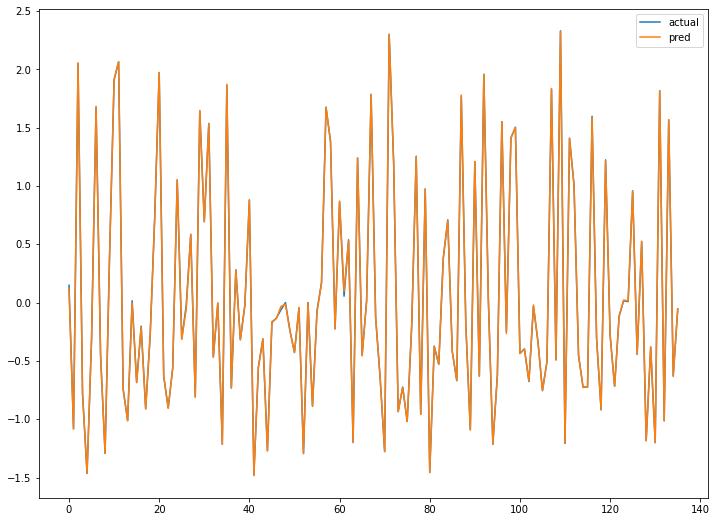

In [77]:
plt.figure(figsize=(12,9))
plt.plot(y_test.values,label='actual')
plt.plot(pred,label='pred')
plt.legend()
plt.show()